In [1]:
import pandas as pd
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv", delimiter = ',', low_memory=False)
test=pd.read_csv("test.csv", delimiter = ',', low_memory=False)
submission=pd.read_csv('answer_sample.csv')
train = train.apply(pd.to_numeric, errors='coerce')
test = test.apply(pd.to_numeric, errors='coerce')

In [3]:
print (train.dtypes)

age                     float64
afib                    float64
chf                     float64
copd                    float64
diabetes                float64
htn                     float64
spo2                    float64
avg_spo2                float64
heartrate               float64
avg_heartrate           float64
bloodpressuresys        float64
avg_bloodpressuresys    float64
bloodpressuredia        float64
avg_bloodpressuredia    float64
total_alert             float64
intervention            float64
dtype: object


In [4]:
train.head(10)

,age,afib,chf,copd,diabetes,htn,spo2,avg_spo2,heartrate,avg_heartrate,bloodpressuresys,avg_bloodpressuresys,bloodpressuredia,avg_bloodpressuredia,total_alert,intervention
0,76.0,0.0,0.0,1.0,0.0,0.0,96.000000,95.625000,86.000000,68.000000,129.000000,107.250000,64.000000,59.875000,0.0,0.0
1,76.0,0.0,0.0,1.0,0.0,0.0,94.000000,96.000000,63.000000,65.615385,114.000000,111.230769,63.000000,60.769231,0.0,0.0
2,78.0,0.0,0.0,1.0,0.0,1.0,99.000000,94.875000,74.000000,69.875000,125.000000,129.875000,71.000000,68.750000,0.0,0.0
3,64.0,0.0,0.0,1.0,0.0,1.0,96.000000,94.290323,88.000000,81.741935,135.000000,129.064516,73.000000,73.935484,0.0,0.0
4,69.0,0.0,0.0,1.0,0.0,1.0,96.000000,96.071429,83.000000,81.928571,144.000000,125.785714,84.000000,84.142857,0.0,0.0
5,69.0,0.0,0.0,1.0,0.0,1.0,92.019894,95.208855,64.801057,70.527563,79.960211,101.936700,54.840846,66.487775,1.0,1.0
6,65.0,0.0,0.0,0.0,0.0,1.0,93.943507,94.414313,72.112987,68.633081,75.258009,84.505971,45.516018,56.334596,1.0,1.0
7,76.0,0.0,0.0,0.0,0.0,1.0,97.000000,96.846154,55.000000,62.000000,145.000000,138.692308,82.000000,68.384615,0.0,0.0
8,59.0,0.0,0.0,1.0,0.0,0.0,99.000000,96.000000,90.000000,86.500000,108.000000,113.666667,71.000000,78.500000,0.0,0.0
9,66.0,0.0,0.0,1.0,0.0,0.0,89.979936,93.895318,130.804013,98.272048,129.763884,114.971379,94.665891,68.758983,1.0,1.0


In [5]:
test.isna().sum()

id                      0
age                     0
afib                    0
chf                     0
copd                    0
diabetes                0
htn                     0
spo2                    0
avg_spo2                0
heartrate               0
avg_heartrate           0
bloodpressuresys        0
avg_bloodpressuresys    0
bloodpressuredia        0
avg_bloodpressuredia    0
total_alert             0
dtype: int64

In [6]:
train.isna().sum()

age                     1
afib                    1
chf                     1
copd                    1
diabetes                1
htn                     1
spo2                    1
avg_spo2                1
heartrate               1
avg_heartrate           1
bloodpressuresys        1
avg_bloodpressuresys    1
bloodpressuredia        1
avg_bloodpressuredia    1
total_alert             1
intervention            1
dtype: int64

In [7]:
train[train['age'].isna()]

,age,afib,chf,copd,diabetes,htn,spo2,avg_spo2,heartrate,avg_heartrate,bloodpressuresys,avg_bloodpressuresys,bloodpressuredia,avg_bloodpressuredia,total_alert,intervention
126759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train = train. dropna()

In [9]:
train[train['age']<0]

,age,afib,chf,copd,diabetes,htn,spo2,avg_spo2,heartrate,avg_heartrate,bloodpressuresys,avg_bloodpressuresys,bloodpressuredia,avg_bloodpressuredia,total_alert,intervention
631,-5462.0,0.0,0.0,1.0,0.0,1.0,93.428750,97.197174,63.872917,66.516870,104.252919,138.341955,47.125836,72.770081,1.0,1.0
1143,-3827.0,0.0,0.0,1.0,0.0,1.0,90.807332,94.640665,67.611935,70.526002,122.671611,143.402302,55.447741,75.719125,1.0,1.0
1493,-4185.0,1.0,0.0,0.0,0.0,1.0,96.462753,98.772385,63.731377,68.192249,127.546259,151.189610,58.941298,79.129792,1.0,1.0
1933,-5439.0,1.0,0.0,0.0,0.0,1.0,95.711938,98.803669,63.355969,67.238088,110.840630,144.932820,47.679076,74.186928,1.0,1.0
2216,-2693.0,0.0,0.0,1.0,0.0,1.0,89.110192,92.943526,69.478788,72.223141,133.872731,145.184298,62.915154,78.236548,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296222,-6629.0,1.0,0.0,1.0,0.0,1.0,98.000000,99.071429,65.000000,66.928571,110.000000,127.785714,74.000000,66.500000,0.0,0.0
297591,-199.0,0.0,0.0,1.0,0.0,1.0,86.339511,89.370947,64.924553,70.165558,119.056915,136.467693,67.792851,84.921749,1.0,1.0
297938,-6629.0,1.0,0.0,1.0,0.0,1.0,98.000000,99.200000,70.000000,66.200000,97.000000,111.800000,71.000000,55.000000,0.0,0.0
297952,-886.0,1.0,0.0,0.0,0.0,0.0,94.139997,95.364655,115.460176,93.394758,136.280139,139.172001,81.720150,79.218033,1.0,1.0


age에 음수가 있는 것은 잘못된 값이라 생각되어, 평균 값으로 바꿔줬다. 두 번 한 이유는, 첫번째 평균은 음수가 포함된 평균이기에, 일단 걔네를 양수로 바꾼 뒤 다시 한 것이다.

In [10]:
train['age'].mean()

69.93986646622156

In [11]:
test.loc[test.age < 0, 'age']=69.93986646622156

In [12]:
train.loc[train.age < 0, 'age']=69.93986646622156

In [13]:
train['age'].mean()

74.34081864916462

In [14]:
train.loc[train.age == 69.93986646622156, 'age']=74.34081864916462

In [15]:
test.loc[test.age == 69.93986646622156, 'age']=74.34081864916462

In [16]:
train['age'].mean()

74.34587976104633

In [17]:
test[test['age']<0]

,id,age,afib,chf,copd,diabetes,htn,spo2,avg_spo2,heartrate,avg_heartrate,bloodpressuresys,avg_bloodpressuresys,bloodpressuredia,avg_bloodpressuredia,total_alert


<AxesSubplot:>

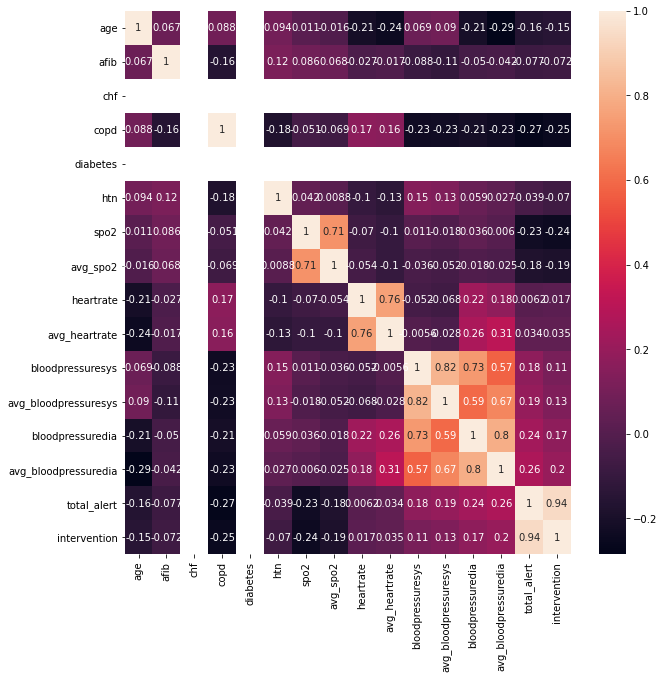

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

chf 와 diabetes는 constant 이기에 features 후보에서 제외

In [19]:
features=["age","afib","copd","htn","spo2","avg_spo2","heartrate","avg_heartrate","bloodpressuresys","avg_bloodpressuresys","bloodpressuredia","avg_bloodpressuredia","total_alert"]
X_train=train[features]
Y_train=train['intervention']
X_test=test[features]

In [20]:
test1 = SelectKBest(score_func=f_classif, k='all')
fit = test1.fit(X_train, Y_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)
print(X_test)

[[84.          0.          1.         ... 89.         74.11111111
   0.        ]
 [77.          0.          0.         ... 75.         77.83333333
   0.        ]
 [63.          1.          0.         ... 86.12731918 95.84076281
   1.        ]
 ...
 [87.          0.          0.         ... 47.50502034 61.52870796
   1.        ]
 [76.          1.          1.         ... 68.         68.93333333
   0.        ]
 [63.          0.          1.         ... 49.91094419 61.90623391
   1.        ]]


밑에 param_grid 에 더 많은 값들을 시도해보았다. (ex: max_depth: None, 10, 100 넣고 10이 최적이라 나와서 10 언저리 숫자만 넣고 다시 시도)

In [22]:
param_grid = {
    'n_estimators': [100,1000],
    'max_depth': [28,30,32],
    'min_samples_split': [0.01,0.001],
    'max_features': ['sqrt','auto],
}
kf = KFold(random_state=30,
           n_splits=2,
           shuffle=True,
          )
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

In [23]:
grid_search.fit(X_train,Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=KFold(n_splits=2, random_state=30, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [28, 30, 32], 'max_features': ['sqrt'],
                         'min_samples_split': [0.01], 'n_estimators': [100]},
             verbose=2)

In [24]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 100}

grid search로 나온 best_params의 값들을 가지고, 최적이라 생각되는 값으로 다시 model을 만들어서 해주었다.

In [25]:
model1=RandomForestRegressor(n_estimators=2000,max_depth=30,max_features='sqrt',min_samples_split=0.0005,n_jobs=-1)
model1.fit(X_train,Y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt',
                      min_samples_split=0.0005, n_estimators=2000, n_jobs=-1)

In [26]:
pre3=model1.predict(X_test)
pre3 = pre3.round(0)
pre3 = pre3.astype(int)

In [27]:
submission['intervention']=pre3

In [28]:
submission.to_csv('model2.csv',index=False)